## Libraries and Load Dataset

In [2]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [3]:
# NLP Librabries
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load Data
df = pd.read_csv("test.csv")
df

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com
...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,6/17/2011,johnny.palmer@enron.com
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,1/20/2011,johnny.palmer@enron.com
2188,(No Subject),Good to finally hear from. Judging from your ...,1/2/2011,don.baughman@enron.com
2189,League is Set,It looks like we have our 12 teams. We will p...,3/11/2011,rhonda.denton@enron.com


In [11]:
# Rename columns for easier access
df.rename(columns={'from': 'Employee', 'body': 'Message', 'date': 'Date'}, inplace=True)

# Preview
df.head()

,Subject,Message,Date,Employee
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


## TASK 1: Sentiment Labeling
#### Using Transformer Model

Load the Model + Tokenizer

In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import re
import emoji
import torch
from tqdm import tqdm

# Load model
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

  Preprocessing Function

In [13]:
def preprocess(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)  # remove links
    text = emoji.demojize(text)          # convert emojis to text
    text = re.sub(r'\s+', ' ', text)     # collapse spaces
    return text.strip()

In [14]:
# Define label mapping for this model
labels = ['Negative', 'Neutral', 'Positive']

def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)
        predicted_class = torch.argmax(probs, dim=1).item()
    return labels[predicted_class]

  Sentiment Prediction Function

🚀 5. Apply to Your Dataset

In [26]:
!pip install tokenizer

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
import torch.nn.functional as F


In [ ]:
df['Sentiment'] = df['Message'].apply(get_sentiment)

In [20]:
df.head()

,Subject,Message,Date,Employee,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Neutral


In [21]:
df[['Employee', 'Date', 'Message', 'Sentiment']].head()

,Employee,Date,Message,Sentiment
0,sally.beck@enron.com,5/10/2010,EnronOptions Announcement\n\n\nWe have updated...,Positive
1,eric.bass@enron.com,7/29/2010,"Marc,\n\nUnfortunately, today is not going to ...",Negative
2,sally.beck@enron.com,7/25/2011,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",Neutral
3,johnny.palmer@enron.com,3/25/2010,we were thinking papasitos (we can meet somewh...,Neutral
4,lydia.delgado@enron.com,5/21/2011,Since you never gave me the $20 for the last t...,Neutral


In [22]:
df.to_csv("labeled_emails.csv", index=False)

In [23]:
df = pd.read_csv("labeled_emails.csv")
df

,Subject,Message,Date,Employee,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Neutral
...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,6/17/2011,johnny.palmer@enron.com,Positive
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,1/20/2011,johnny.palmer@enron.com,Neutral
2188,(No Subject),Good to finally hear from. Judging from your ...,1/2/2011,don.baughman@enron.com,Positive
2189,League is Set,It looks like we have our 12 teams. We will p...,3/11/2011,rhonda.denton@enron.com,Neutral


## Task 2: EDA & Visualization

In [24]:
df.describe()

,Subject,Message,Date,Employee,Sentiment
count,2191,2191,2191,2191,2191
unique,1251,1539,690,10,3
top,(No Subject),\n\n,7/1/2011,lydia.delgado@enron.com,Neutral
freq,141,21,9,284,1468


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   Message    2191 non-null   object
 2   Date       2191 non-null   object
 3   Employee   2191 non-null   object
 4   Sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


 Overview of Sentiment Distribution

C:\Users\USER\AppData\Local\Temp\ipykernel_28208\590001664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='pastel')


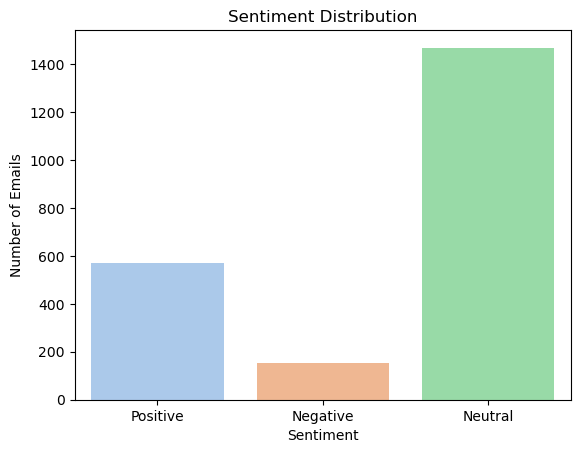

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of sentiment labels
sns.countplot(x='Sentiment', data=df, palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Emails")
plt.show()

  Sentiment Trend Over Time

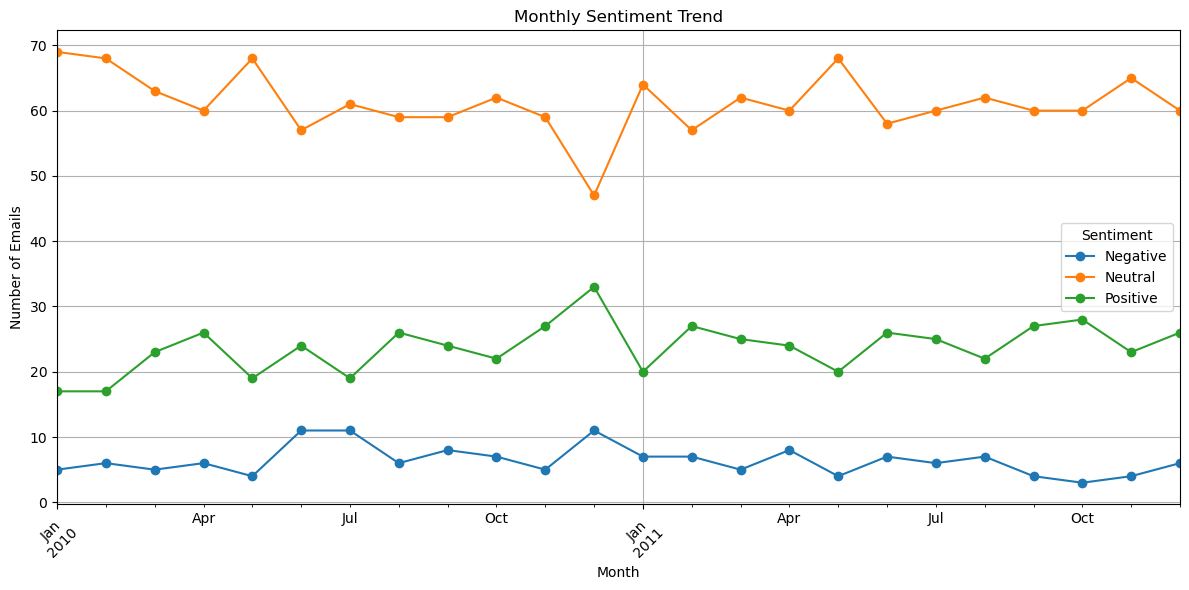

In [27]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by month
monthly_sentiment = df.groupby([df['Date'].dt.to_period('M'), 'Sentiment']).size().unstack().fillna(0)

# Plot
monthly_sentiment.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Monthly Sentiment Trend")
plt.xlabel("Month")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Top Senders by Sentiment

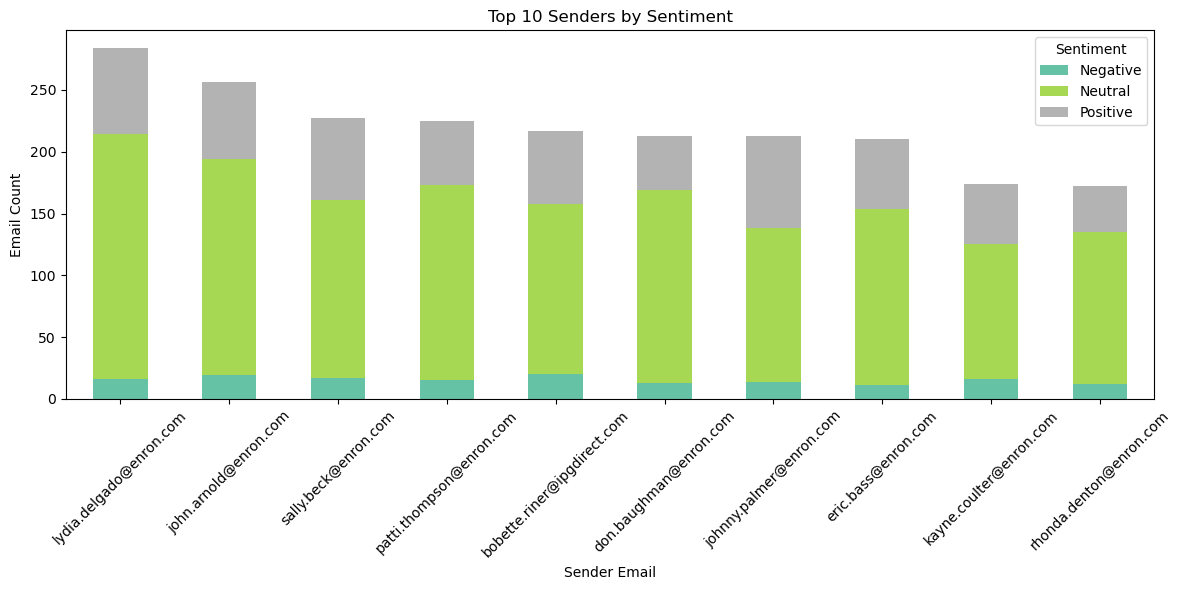

In [28]:
# Count of sentiments per sender
top_senders = df.groupby(['Employee', 'Sentiment']).size().unstack().fillna(0)

# Get top 10 by total emails
top_senders['total'] = top_senders.sum(axis=1)
top_10 = top_senders.sort_values('total', ascending=False).drop('total', axis=1).head(10)

# Plot
top_10.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Top 10 Senders by Sentiment")
plt.xlabel("Sender Email")
plt.ylabel("Email Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A. Word Cloud for Each Sentiment

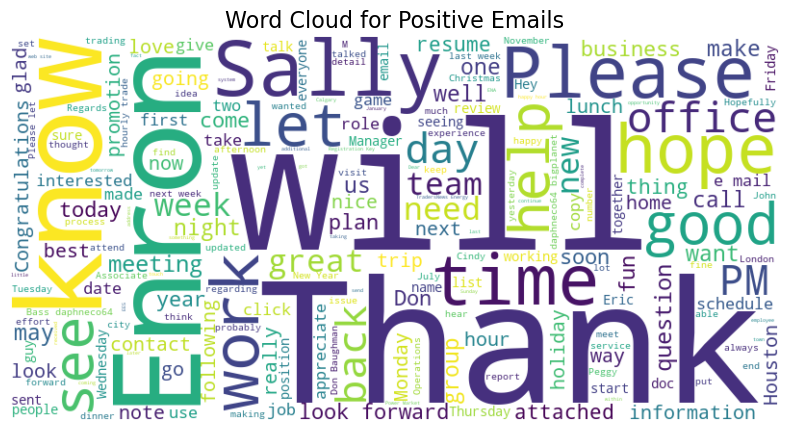

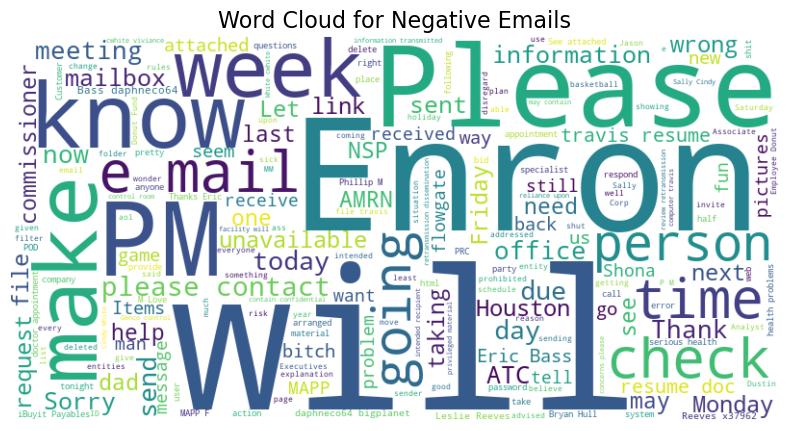

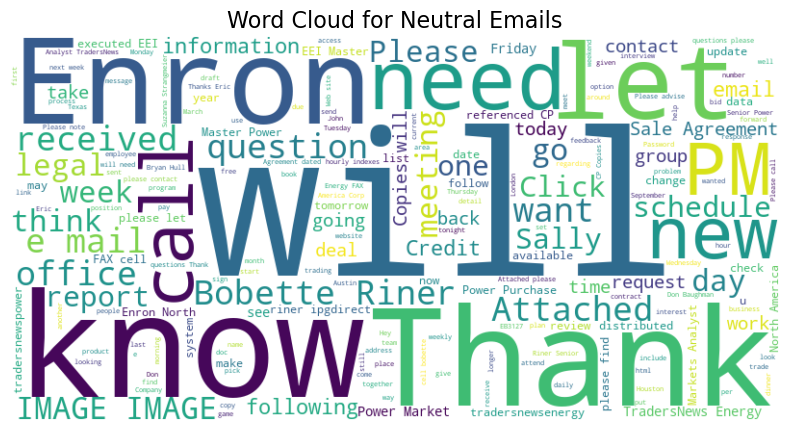

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each sentiment
for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['Message'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment.capitalize()} Emails", fontsize=16)
    plt.show()

Most Frequent Words per Sentiment

In [30]:
from collections import Counter
import re

def get_top_words(text_series, n=10):
    words = " ".join(text_series.dropna()).lower()
    words = re.findall(r'\b\w+\b', words)
    return Counter(words).most_common(n)

for sentiment in df['Sentiment'].unique():
    top_words = get_top_words(df[df['Sentiment'] == sentiment]['Message'])
    print(f"\nTop words in {sentiment} emails:")
    for word, count in top_words:
        print(f"{word}: {count}")



Top words in Positive emails:
the: 1089
to: 1011
you: 737
i: 689
and: 631
for: 542
a: 518
in: 451
of: 416
on: 411

Top words in Negative emails:
the: 280
to: 171
i: 140
you: 95
and: 90
is: 89
for: 87
that: 71
a: 67
on: 64

Top words in Neutral emails:
the: 2036
to: 1551
you: 1073
and: 991
i: 812
for: 795
of: 634
in: 630
a: 628
will: 606


Heatmap of Sentiment by Day of Week

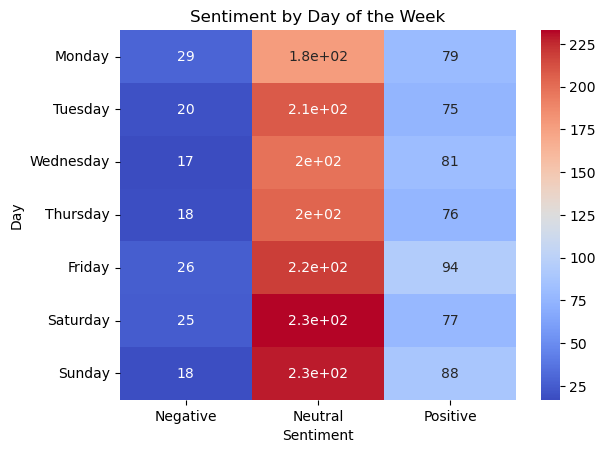

In [31]:
df['day'] = df['Date'].dt.day_name()
sentiment_by_day = df.groupby(['day', 'Sentiment']).size().unstack().fillna(0)

# Reorder days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sentiment_by_day = sentiment_by_day.reindex(order)

sns.heatmap(sentiment_by_day, annot=True, cmap='coolwarm')
plt.title("Sentiment by Day of the Week")
plt.ylabel("Day")
plt.xlabel("Sentiment")
plt.show()


 Positive vs. Negative Sentiment Ratio Trend

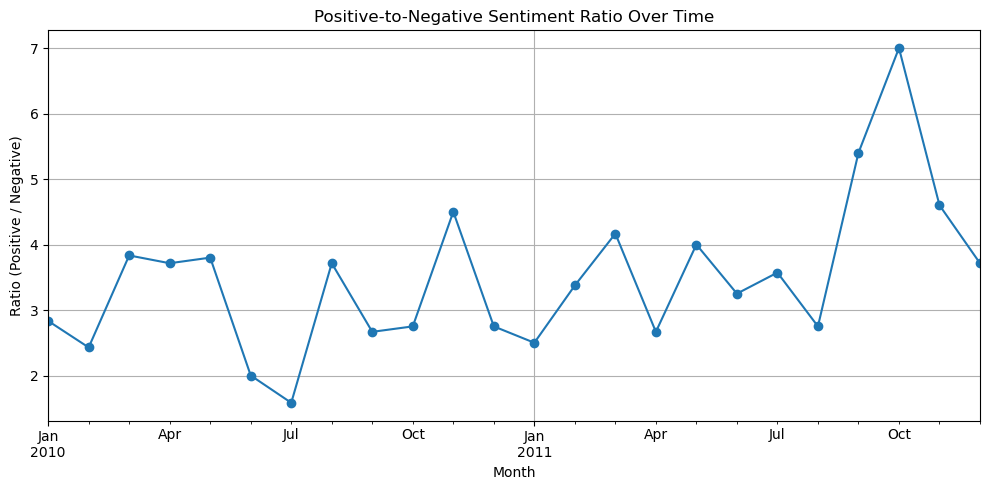

In [32]:
# Filter only Positive and Negative
ratio_df = df[df['Sentiment'].isin(['Positive', 'Negative'])].copy()
ratio_df['month'] = ratio_df['Date'].dt.to_period('M')

# Count sentiment per month
monthly_counts = ratio_df.groupby(['month', 'Sentiment']).size().unstack().fillna(0)

# Compute ratio
monthly_counts['ratio'] = monthly_counts['Positive'] / (monthly_counts['Negative'] + 1)

# Plot ratio
monthly_counts['ratio'].plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Positive-to-Negative Sentiment Ratio Over Time")
plt.xlabel("Month")
plt.ylabel("Ratio (Positive / Negative)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
df

,Subject,Message,Date,Employee,Sentiment,day,sentiment_score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,Positive,Monday,1
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,Negative,Thursday,-1
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Neutral,Monday,0
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,Neutral,Thursday,0
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Neutral,Saturday,0
...,...,...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,2011-06-17,johnny.palmer@enron.com,Positive,Friday,1
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,2011-01-20,johnny.palmer@enron.com,Neutral,Thursday,0
2188,(No Subject),Good to finally hear from. Judging from your ...,2011-01-02,don.baughman@enron.com,Positive,Sunday,1
2189,League is Set,It looks like we have our 12 teams. We will p...,2011-03-11,rhonda.denton@enron.com,Neutral,Friday,0


# Task 3: Employee Score Calculation

In [34]:
# Mapping sentiment to score
sentiment_score_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
df['sentiment_score'] = df['Sentiment'].map(sentiment_score_map)

# Aggregatting sentiment scores per employee
employee_scores = df.groupby('Employee')['sentiment_score'].agg(['count', 'sum', 'mean']).reset_index()
employee_scores.columns = ['employee', 'message_count', 'total_score', 'average_score']

# Display Top and Bottom Employees
top_employees = employee_scores.sort_values(by='average_score', ascending=False).head(10)
bottom_employees = employee_scores.sort_values(by='average_score').head(10)

# Display results
print("Top 10 Employees by Sentiment Score:")
print(top_employees)

Top 10 Employees by Sentiment Score:
                      employee  message_count  total_score  average_score
4      johnny.palmer@enron.com            213           61       0.286385
9         sally.beck@enron.com            227           49       0.215859
2          eric.bass@enron.com            210           45       0.214286
6      lydia.delgado@enron.com            284           54       0.190141
5      kayne.coulter@enron.com            174           33       0.189655
0  bobette.riner@ipgdirect.com            217           39       0.179724
3        john.arnold@enron.com            256           43       0.167969
7     patti.thompson@enron.com            225           37       0.164444
1       don.baughman@enron.com            213           31       0.145540
8      rhonda.denton@enron.com            172           25       0.145349


C:\Users\USER\AppData\Local\Temp\ipykernel_28208\3427980074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_employees, x='average_score', y='employee', palette='Greens_r')


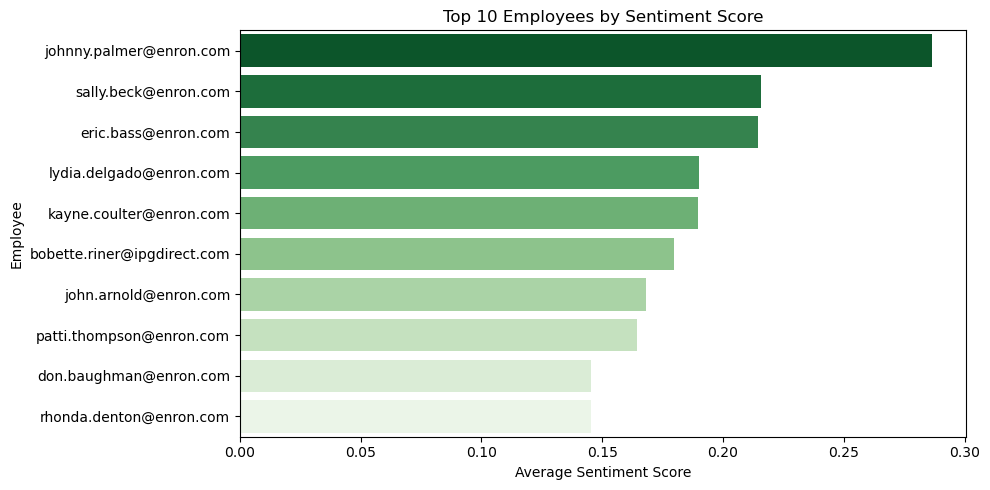

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_employees, x='average_score', y='employee', palette='Greens_r')
plt.title('Top 10 Employees by Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Employee')
plt.tight_layout()
plt.show()


In [43]:
employee_scores

,employee,message_count,total_score,average_score
0,bobette.riner@ipgdirect.com,217,39,0.179724
1,don.baughman@enron.com,213,31,0.145540
2,eric.bass@enron.com,210,45,0.214286
3,john.arnold@enron.com,256,43,0.167969
4,johnny.palmer@enron.com,213,61,0.286385
5,kayne.coulter@enron.com,174,33,0.189655
6,lydia.delgado@enron.com,284,54,0.190141
7,patti.thompson@enron.com,225,37,0.164444
8,rhonda.denton@enron.com,172,25,0.145349
9,sally.beck@enron.com,227,49,0.215859


In [49]:
monthly_sentiment = (
    df.groupby(['month', 'Employee'])
      .agg(monthly_avg_score=('sentiment_score', 'mean'))
      .reset_index()
)


In [50]:
monthly_scores_sorted = monthly_sentiment.sort_values(
    by=['month', 'monthly_avg_score', 'Employee'],
    ascending=[True, False, True]
)


In [51]:
 monthly_sentiment

,month,Employee,monthly_avg_score
0,2010-01,bobette.riner@ipgdirect.com,0.000000
1,2010-01,don.baughman@enron.com,0.222222
2,2010-01,eric.bass@enron.com,0.300000
3,2010-01,john.arnold@enron.com,0.000000
4,2010-01,johnny.palmer@enron.com,0.333333
...,...,...,...
235,2011-12,kayne.coulter@enron.com,0.444444
236,2011-12,lydia.delgado@enron.com,0.235294
237,2011-12,patti.thompson@enron.com,0.250000
238,2011-12,rhonda.denton@enron.com,0.363636


In [52]:
# Sort by month, descending score, and then alphabetical employee name
monthly_scores_sorted = monthly_sentiment.sort_values(
    by=['month', 'monthly_avg_score', 'Employee'],
    ascending=[True, False, True]
)

# Create top 3 positive entries per month
top_positive = (
    monthly_scores_sorted[monthly_scores_sorted['monthly_avg_score'] > 0]
    .groupby('month')
    .head(3)
    .copy()
)
top_positive['Type'] = 'Top Positive'

# Sort by month, ascending score, and alphabetical order
monthly_scores_sorted_neg = monthly_sentiment.sort_values(
    by=['month', 'monthly_avg_score', 'Employee'],
    ascending=[True, True, True]
)

# Create top 3 negative entries per month
top_negative = (
    monthly_scores_sorted_neg[monthly_scores_sorted_neg['monthly_avg_score'] < 0]
    .groupby('month')
    .head(3)
    .copy()
)
top_negative['Type'] = 'Top Negative'

# Combine the results
top_combined = pd.concat([top_positive, top_negative])

# Sort final output by month and Type
top_combined = top_combined[['month', 'Type', 'Employee', 'monthly_avg_score']]
top_combined = top_combined.sort_values(by=['month', 'Type', 'monthly_avg_score'], ascending=[True, True, False])

# Reset index
top_combined.reset_index(drop=True, inplace=True)

print(top_combined.head(10))  # Preview first few rows

# Save as CSV
top_combined.to_csv('ranked_employee_sentiment.csv', index=False)


     month          Type                     Employee  monthly_avg_score
0  2010-01  Top Negative         sally.beck@enron.com          -0.111111
1  2010-01  Top Positive      johnny.palmer@enron.com           0.333333
2  2010-01  Top Positive          eric.bass@enron.com           0.300000
3  2010-01  Top Positive     patti.thompson@enron.com           0.300000
4  2010-02  Top Negative         sally.beck@enron.com          -0.166667
5  2010-02  Top Negative      kayne.coulter@enron.com          -0.250000
6  2010-02  Top Positive      lydia.delgado@enron.com           1.000000
7  2010-02  Top Positive  bobette.riner@ipgdirect.com           0.285714
8  2010-02  Top Positive          eric.bass@enron.com           0.250000
9  2010-03  Top Positive         sally.beck@enron.com           0.500000


## Task 4: Employee Ranking
• Objective:Generate ranked lists of employees based on their monthly sentiment scores.• Requirements: Create two distinct lists: Top Three Positive Employees: The three employees with the highestpositive scores in a given month. Top Three Negative Employees: The three employees with thelowest (most negative) scores in each month. Sort them first in descending order and then in alphabetical order.

In [53]:
# Top 3 Positive per month
top_positive = (
    monthly_sentiment[monthly_sentiment['monthly_avg_score'] > 0]
    .sort_values(by=['monthly_avg_score', 'Employee'], ascending=[False, True])
    .groupby('month')
    .head(3)
)
top_positive['Type'] = 'Top Positive'

# Top 3 Negative per month
top_negative = (
    monthly_sentiment[monthly_sentiment['monthly_avg_score'] < 0]
    .sort_values(by=['monthly_avg_score', 'Employee'], ascending=[True, True])
    .groupby('month')
    .head(3)
)
top_negative['Type'] = 'Top Negative'

# Combine both
ranked_employees = pd.concat([top_negative, top_positive], ignore_index=True)

# Final sort by monthly_avg_score (descending), then Employee (alphabetically)
ranked_employees = ranked_employees.sort_values(
    by=['monthly_avg_score', 'Employee'], 
    ascending=[False, True]
).reset_index(drop=True)

# Display final result
print(ranked_employees[['month', 'Type', 'Employee', 'monthly_avg_score']])


      month          Type                  Employee  monthly_avg_score
0   2010-08  Top Positive    don.baughman@enron.com           1.000000
1   2011-11  Top Positive       eric.bass@enron.com           1.000000
2   2011-08  Top Positive   kayne.coulter@enron.com           1.000000
3   2010-02  Top Positive   lydia.delgado@enron.com           1.000000
4   2010-08  Top Positive  patti.thompson@enron.com           1.000000
..      ...           ...                       ...                ...
90  2010-07  Top Negative   rhonda.denton@enron.com          -0.333333
91  2011-11  Top Negative   rhonda.denton@enron.com          -0.400000
92  2011-04  Top Negative     john.arnold@enron.com          -0.500000
93  2010-06  Top Negative   kayne.coulter@enron.com          -0.500000
94  2011-06  Top Negative   kayne.coulter@enron.com          -1.000000

[95 rows x 4 columns]


In [54]:
monthly_sentiment

,month,Employee,monthly_avg_score
0,2010-01,bobette.riner@ipgdirect.com,0.000000
1,2010-01,don.baughman@enron.com,0.222222
2,2010-01,eric.bass@enron.com,0.300000
3,2010-01,john.arnold@enron.com,0.000000
4,2010-01,johnny.palmer@enron.com,0.333333
...,...,...,...
235,2011-12,kayne.coulter@enron.com,0.444444
236,2011-12,lydia.delgado@enron.com,0.235294
237,2011-12,patti.thompson@enron.com,0.250000
238,2011-12,rhonda.denton@enron.com,0.363636


In [55]:
top_positive = ranked_employees[ranked_employees['Type'] == 'Top Positive']
top_negative = ranked_employees[ranked_employees['Type'] == 'Top Negative']

# Display a formatted table for each month
months = ranked_employees['month'].unique()

for month in months:
    pos = top_positive[top_positive['month'] == month][['Employee', 'monthly_avg_score']]
    neg = top_negative[top_negative['month'] == month][['Employee', 'monthly_avg_score']]
    
    print(f"\n📅 Month: {month}")
    print("-" * 70)
    print("🔼 Top 3 Positive Employees")
    print(pos.to_string(index=False))
    print("\n🔽 Top 3 Negative Employees")
    print(neg.to_string(index=False))


📅 Month: 2010-08
----------------------------------------------------------------------
🔼 Top 3 Positive Employees
                Employee  monthly_avg_score
  don.baughman@enron.com                1.0
patti.thompson@enron.com                1.0
     eric.bass@enron.com                0.5

🔽 Top 3 Negative Employees
                   Employee  monthly_avg_score
bobette.riner@ipgdirect.com          -0.111111

📅 Month: 2011-11
----------------------------------------------------------------------
🔼 Top 3 Positive Employees
                Employee  monthly_avg_score
     eric.bass@enron.com           1.000000
patti.thompson@enron.com           0.384615
 kayne.coulter@enron.com           0.312500

🔽 Top 3 Negative Employees
               Employee  monthly_avg_score
rhonda.denton@enron.com               -0.4

📅 Month: 2011-08
----------------------------------------------------------------------
🔼 Top 3 Positive Employees
                   Employee  monthly_avg_score
    kayne.coulter

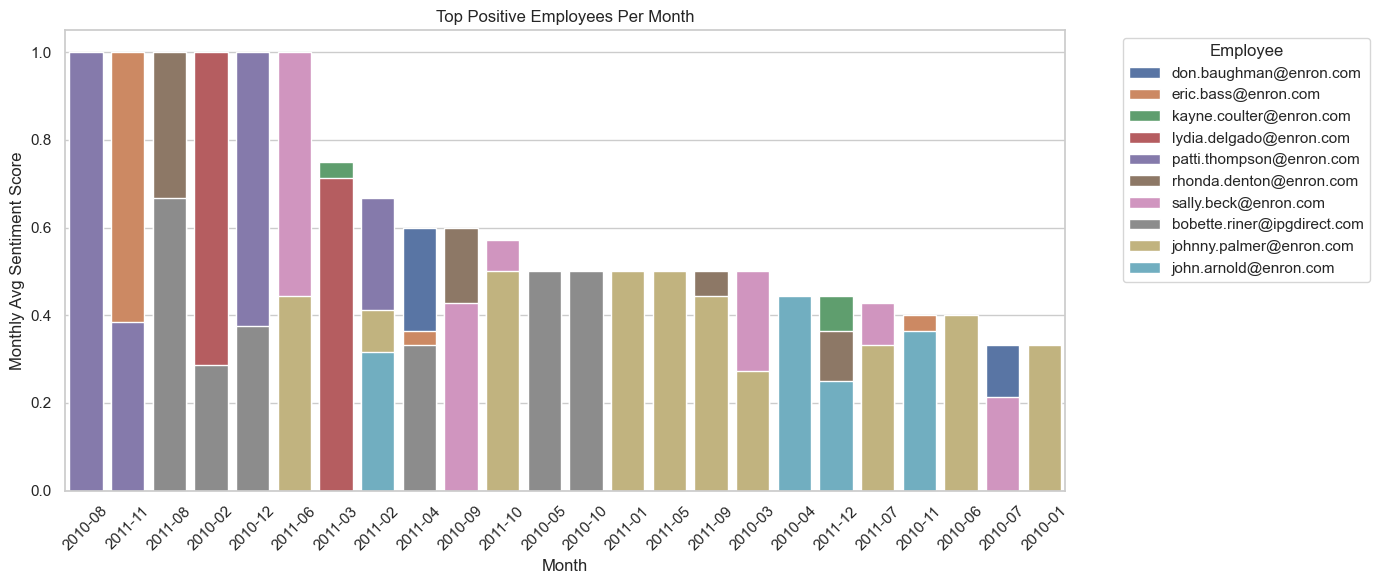

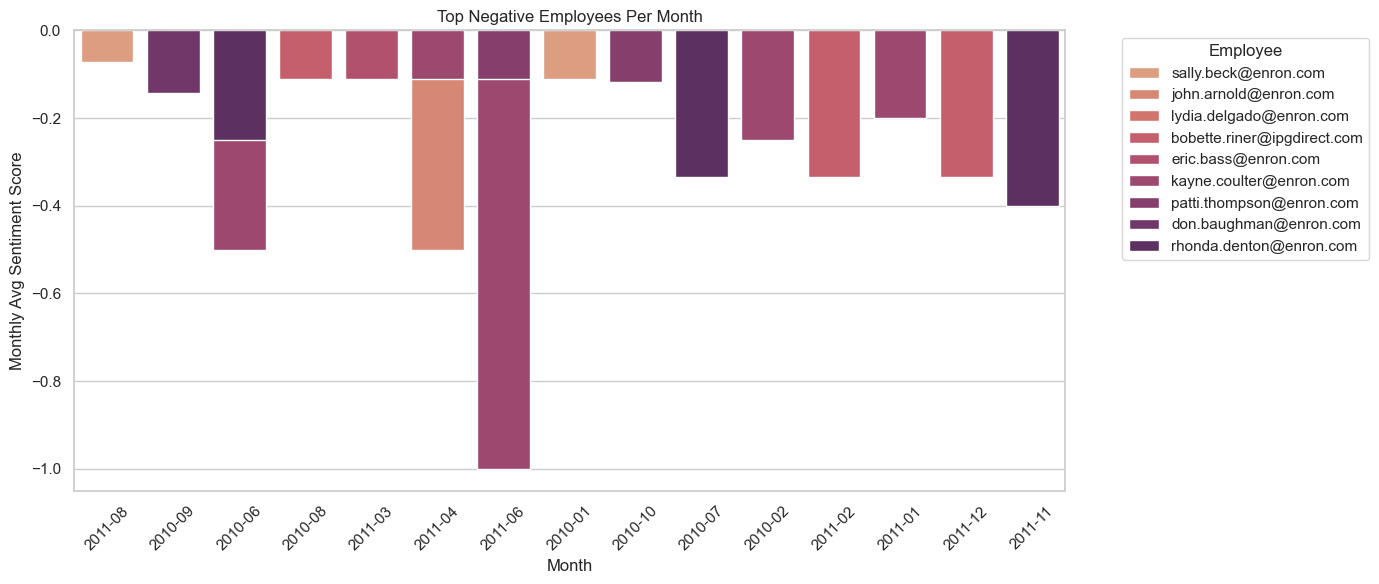

In [251]:
# chart style
sns.set(style="whitegrid")

# top positive scores
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_positive,
    x="month",
    y="monthly_avg_score",
    hue="Employee",
    dodge=False
)
plt.title("Top Positive Employees Per Month")
plt.xticks(rotation=45)
plt.ylabel("Monthly Avg Sentiment Score")
plt.xlabel("Month")
plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# top negative scores
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_negative,
    x="month",
    y="monthly_avg_score",
    hue="Employee",
    dodge=False,
    palette="flare"
)
plt.title("Top Negative Employees Per Month")
plt.xticks(rotation=45)
plt.ylabel("Monthly Avg Sentiment Score")
plt.xlabel("Month")
plt.legend(title="Employee", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Discussion: How the Employee Sentiment Rankings Were Determined
The rankings of employees are based on the average monthly sentiment score derived from employee messages. Here's how the process works:

Sentiment Scoring:
Each message was analyzed using a sentiment analysis tool to assign it a sentiment score.

Positive sentiments received a score above 0

Neutral sentiments are around 0

Negative sentiments are below 0

Monthly Aggregation:
For each employee, the sentiment scores of their messages were grouped and averaged by month to reflect their overall tone or attitude during that period.

Top 3 Selection:
For every month:

The three employees with the highest average sentiment scores were labeled as Top Positive Employees.

The three employees with the lowest (most negative) scores were labeled as Top Negative Employees.

In case of ties, rankings were sorted by score (descending for positive, ascending for negative), and then alphabetically by employee name.

Final Output:
The final result is a monthly leaderboard showing which employees demonstrated the most positive or negative communication trends. This is helpful for identifying potential leaders, motivators, or employees at risk of disengagement.

## Task 5: Flight Risk Identification
• Objective:Identify employees who are at risk of leaving based on their monthly sentiment scores.

In [57]:
# Monthly Sentiment Data

df['month'] = pd.to_datetime(df['Date']).dt.to_period('M').astype(str)
monthly_sentiment = df.groupby(['Employee', 'month'])['sentiment_score'].mean().reset_index()
monthly_sentiment.rename(columns={'sentiment_score': 'monthly_avg_score'}, inplace=True)

Trend Using Linear Regression
A negative slope means their sentiment is dropping.

In [58]:
trend_results = []

for employee, group in monthly_sentiment.groupby('Employee'):
    if len(group) >= 3:  # Need at least 3 months for a trend
        # Convert month to numeric order
        group = group.sort_values('month')
        months = np.arange(len(group)).reshape(-1, 1)
        scores = group['monthly_avg_score'].values.reshape(-1, 1)

        # Fit linear regression
        model = LinearRegression()
        model.fit(months, scores)
        slope = model.coef_[0][0]  # Get the slope

        trend_results.append({
            'employee': employee,
            'months_tracked': len(group),
            'trend_slope': slope,
            'last_sentiment': scores[-1][0]
        })

trend_df = pd.DataFrame(trend_results)


In [59]:
# Flag Flight Risk Employees (Negative Slope)
 
flight_risk_trend = trend_df[trend_df['trend_slope'] < 0].sort_values(by='trend_slope')

print("⚠️ Flight Risk Employees Based on Declining Sentiment:")
print(flight_risk_trend)

⚠️ Flight Risk Employees Based on Declining Sentiment:
                      employee  months_tracked  trend_slope  last_sentiment
0  bobette.riner@ipgdirect.com              24    -0.003804       -0.333333
6      lydia.delgado@enron.com              24    -0.003361        0.235294
7     patti.thompson@enron.com              24    -0.002812        0.250000
1       don.baughman@enron.com              24    -0.000768        0.000000


Insights from task 4
All three employees have consistently declining sentiment, even if current levels aren’t extremely negative.

bobette.riner@ipgdirect.com is the most concerning, with both a negative trend and negative recent sentiment.

Others may not seem urgent now, but if the downward trend continues, they may soon become disengaged.

In [60]:
df

,Subject,Message,Date,Employee,Sentiment,day,sentiment_score,month
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,Positive,Monday,1,2010-05
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,Negative,Thursday,-1,2010-07
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Neutral,Monday,0,2011-07
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,Neutral,Thursday,0,2010-03
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Neutral,Saturday,0,2011-05
...,...,...,...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,2011-06-17,johnny.palmer@enron.com,Positive,Friday,1,2011-06
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,2011-01-20,johnny.palmer@enron.com,Neutral,Thursday,0,2011-01
2188,(No Subject),Good to finally hear from. Judging from your ...,2011-01-02,don.baughman@enron.com,Positive,Sunday,1,2011-01
2189,League is Set,It looks like we have our 12 teams. We will p...,2011-03-11,rhonda.denton@enron.com,Neutral,Friday,0,2011-03


In [61]:
len(group)

24

['Subject', 'Message', 'Date', 'Employee', 'Sentiment', 'day', 'sentiment_score', 'month']


## Task 6: Predict Future Sentiment Trends

 Goal:
Use Linear Regression to forecast an employee’s next month's average sentiment score based on their historical trend.

In [230]:
import pandas as pd

# Load the dataset
df = pd.read_csv("labeled_emails.csv")

# Display the first few rows
df


,Subject,Message,Date,Employee,Sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Neutral
...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,6/17/2011,johnny.palmer@enron.com,Positive
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,1/20/2011,johnny.palmer@enron.com,Neutral
2188,(No Subject),Good to finally hear from. Judging from your ...,1/2/2011,don.baughman@enron.com,Positive
2189,League is Set,It looks like we have our 12 teams. We will p...,3/11/2011,rhonda.denton@enron.com,Neutral


In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [232]:
from scipy.sparse import hstack


# Drop missing data
df.dropna(subset=['Message', 'Sentiment'], inplace=True)

# Map sentiment labels to numeric scores for regression
sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['sentiment_score'] = df['Sentiment'].map(sentiment_map)

# Features and target
X = df['Message']
y = df['sentiment_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train linear regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 0.41645145877653766
R² Score: 0.4238838716265474


Interpretation: Model explains approximately 42% of the variance in sentiment scores, showing promising predictive power for a baseline.